## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [46]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import LinearSVC, SVC

## **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `insurance.csv` dataset.

<b>Note: Remember to label plot axes while plotting.</b>

In [48]:
# Load the dataset
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**1.1 Create a bar chart to compare the average insurance charges by sex and region.**


<Figure size 1200x600 with 0 Axes>

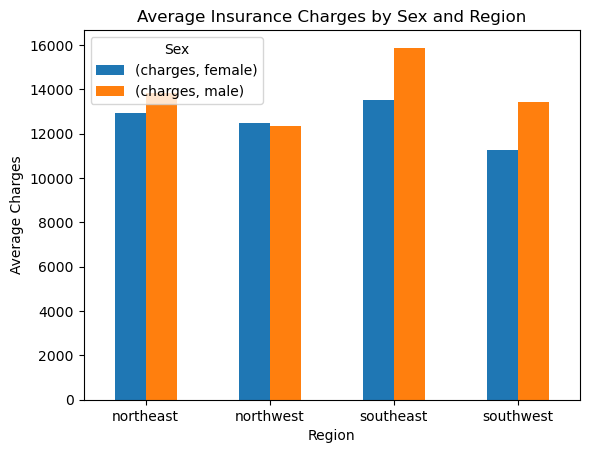

In [49]:
### Code here
grouped_data = insurance_df.groupby(by=['region', 'sex'])[['charges']].mean()
plt.figure(figsize=(12, 6))
grouped_data.unstack().plot(kind='bar', rot=0)
plt.title('Average Insurance Charges by Sex and Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.legend(title='Sex')
plt.show()

In [50]:
### Comment here


**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **sex**
2. **region**
3. **children**
4. **smoker**

**Make subplots in the same graph**

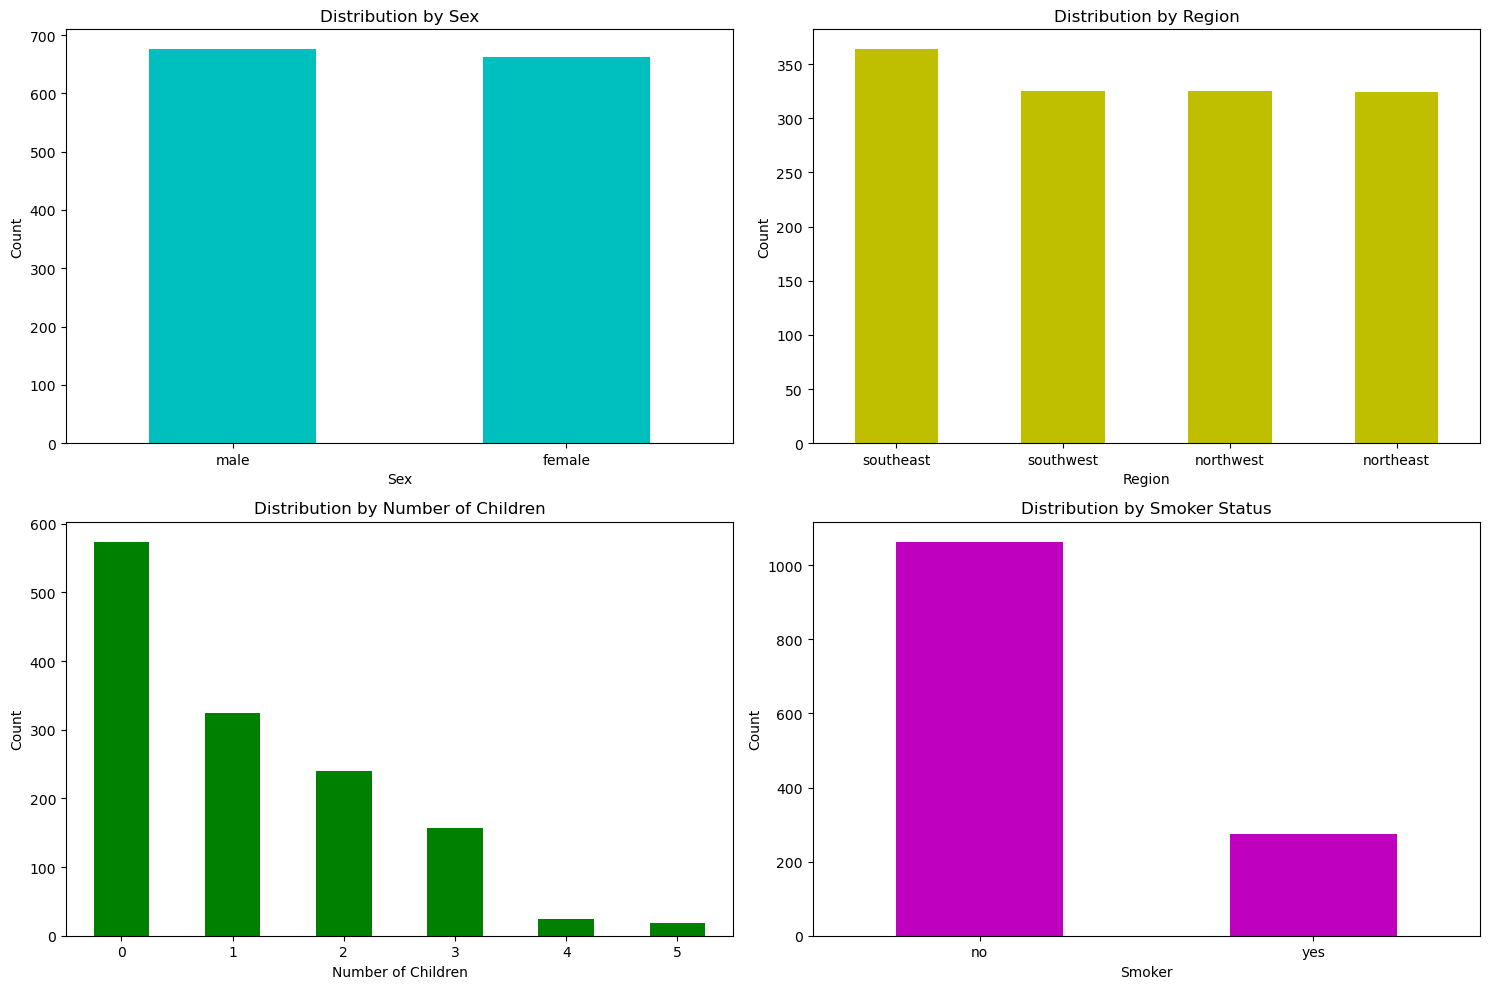

In [51]:
### Code here

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

insurance_df['sex'].value_counts().plot(kind='bar', rot=0, ax=axes[0, 0], color='c')
axes[0, 0].set_title('Distribution by Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')

insurance_df['region'].value_counts().plot(kind='bar', rot=0, ax=axes[0, 1], color='y')
axes[0, 1].set_title('Distribution by Region')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Count')

insurance_df['children'].value_counts().sort_index().plot(kind='bar', rot=0, ax=axes[1, 0], color='g')
axes[1, 0].set_title('Distribution by Number of Children')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Count')

insurance_df['smoker'].value_counts().plot(kind='bar', rot=0, ax=axes[1, 1], color='m')
axes[1, 1].set_title('Distribution by Smoker Status')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**1.3 Compare the insurance charges by age and smoker. Create a Scatter plot for age vs insurance charges categorize them by smoker type.**

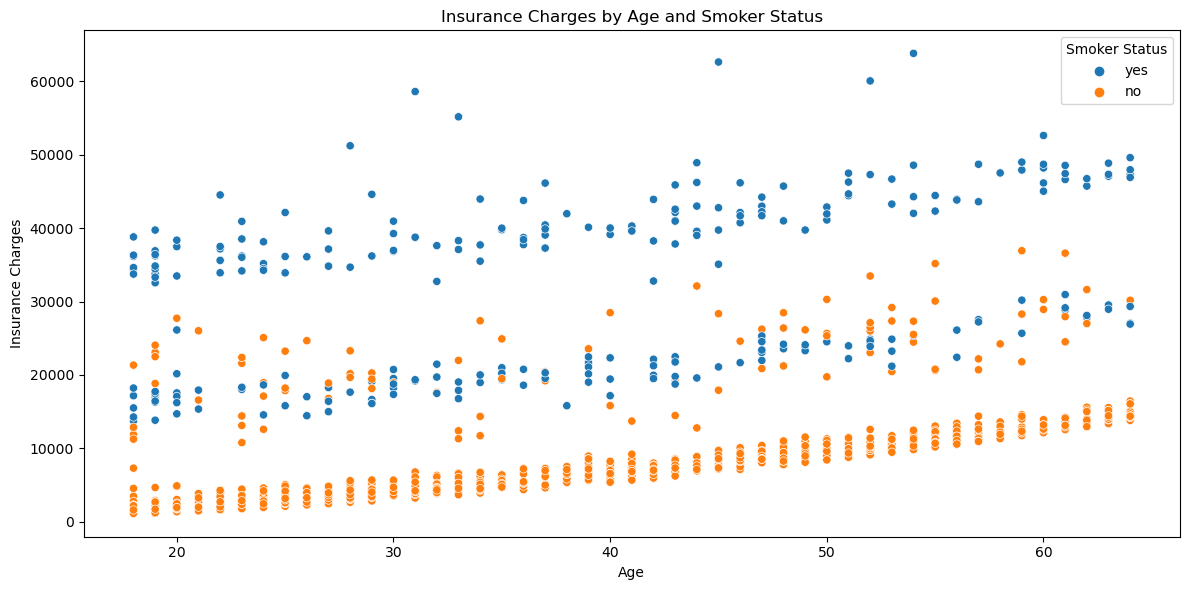

In [52]:
### Code here
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=insurance_df)
plt.title('Insurance Charges by Age and Smoker Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker Status')
plt.tight_layout()
plt.show()

## **Part 2: Linear Models for Regression and Classification**

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**.

### **2.1 Linear Regression**
We will now proceed with splitting the dataset and implementing linear regression to predict `insurance charges`.

In [53]:
# Split the dataset into features and labels
insurance_X = insurance_df.drop(columns=['charges'])
insurance_y = insurance_df['charges']

**2.1.1 Plot relationships between features (age, bmi, children, region) and the target variable `charges` as a small multiple of scatter plots.**
1. age
2. bmi
3. children
4. region

Make sure to label the axes.
<b></b>

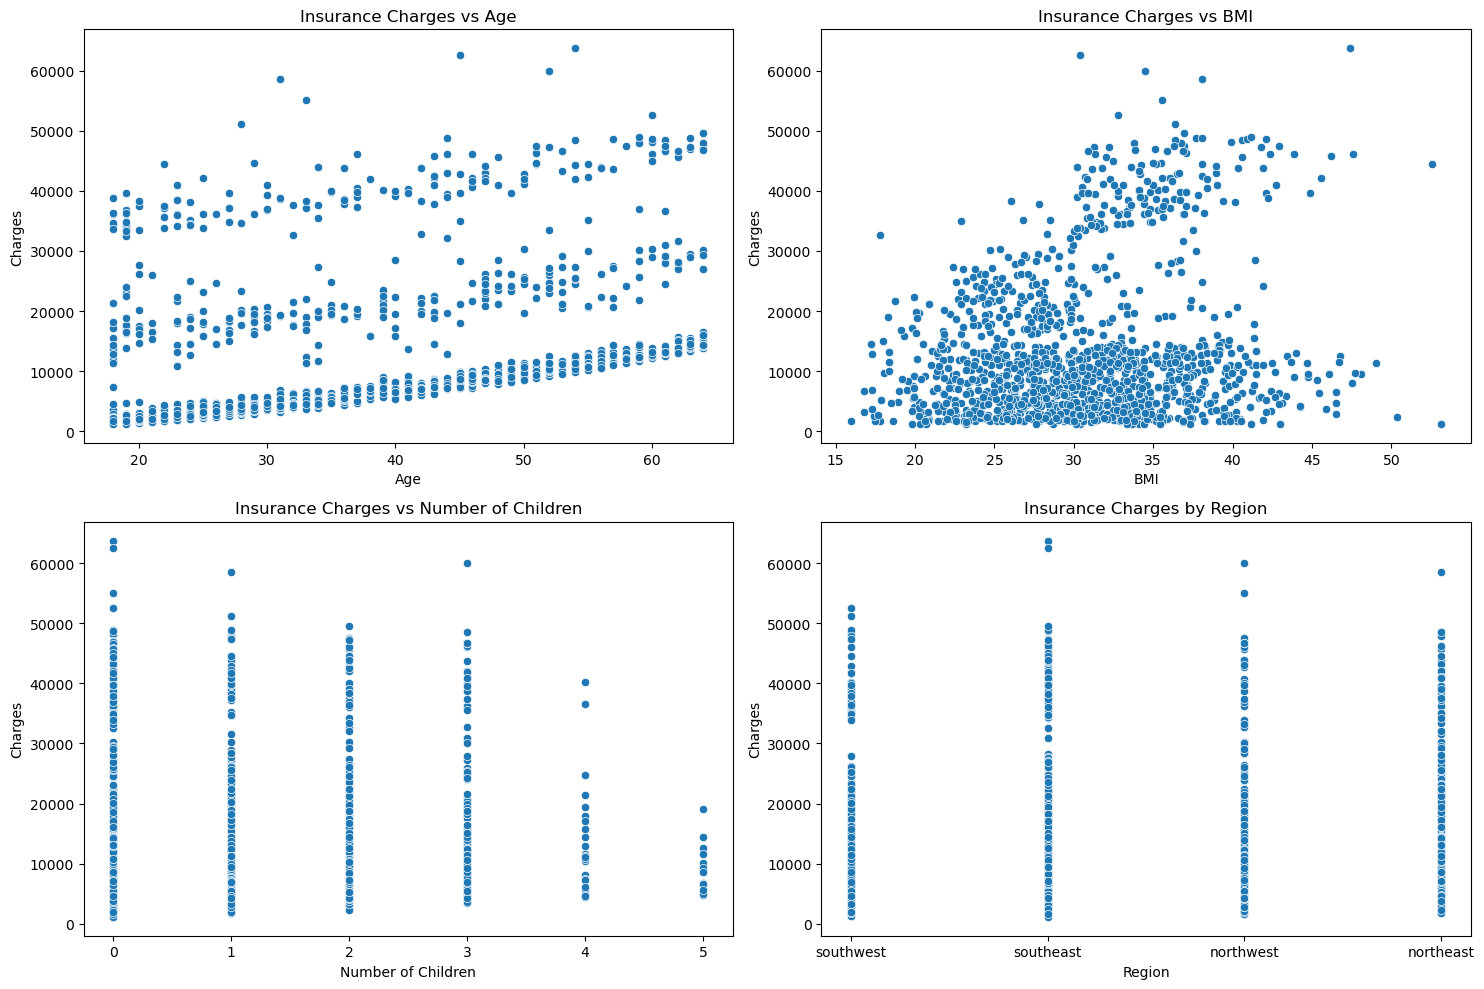

In [54]:
### Code here
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x='age', y='charges', data=insurance_df, ax=axes[0, 0])
axes[0, 0].set_title('Insurance Charges vs Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges')

sns.scatterplot(x='bmi', y='charges', data=insurance_df, ax=axes[0, 1])
axes[0, 1].set_title('Insurance Charges vs BMI')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges')

sns.scatterplot(x='children', y='charges', data=insurance_df, ax=axes[1, 0])
axes[1, 0].set_title('Insurance Charges vs Number of Children')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Charges')

sns.scatterplot(x='region', y='charges', data=insurance_df, ax=axes[1, 1])
axes[1, 1].set_title('Insurance Charges by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Charges')

plt.tight_layout()
plt.show()


**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**


In [55]:
### Comment here
'''
Yeah I think linear regression is pretty good because if we see feature 'age' and 'BMI', we will notice that insurance changes as features changes, 
especially it is almost linear relationship on 'age'.
'''

"\nYeah I think linear regression is pretty good because if we see feature 'age' and 'BMI', we will notice that insurance changes as features changes, \nespecially it is almost linear relationship on 'age'.\n"

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `sex`, `smoker`, `region`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.3 Encode the categorical variables of the Insurance dataset.**

In [56]:
### Code here
insurance_X_encoded = insurance_X.copy()

# Ordinal encoding for 'sex' and 'smoker'
ordinal_encoder = OrdinalEncoder()
insurance_X_encoded[['sex', 'smoker']] = ordinal_encoder.fit_transform(insurance_X_encoded[['sex', 'smoker']])

# One-hot encoding for 'region'
onehot_encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid dummy variable trap
region_encoded = onehot_encoder.fit_transform(insurance_X_encoded[['region']])
region_columns = onehot_encoder.get_feature_names_out(['region'])

insurance_X_encoded = insurance_X_encoded.drop(columns=['region'])
insurance_X_encoded[region_columns] = region_encoded
insurance_X_encoded.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0.0,27.900,0,1.0,0.0,0.0,1.0
1,18,1.0,33.770,1,0.0,0.0,1.0,0.0
2,28,1.0,33.000,3,0.0,0.0,1.0,0.0
3,33,1.0,22.705,0,0.0,1.0,0.0,0.0
4,32,1.0,28.880,0,0.0,1.0,0.0,0.0


In [57]:
### Code here


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.8). If yes, drop one from each pair of highly correlated features from the dataframe. It is fine if you do not find any highly correlated features. Why could this be necessary before proceeding further?**

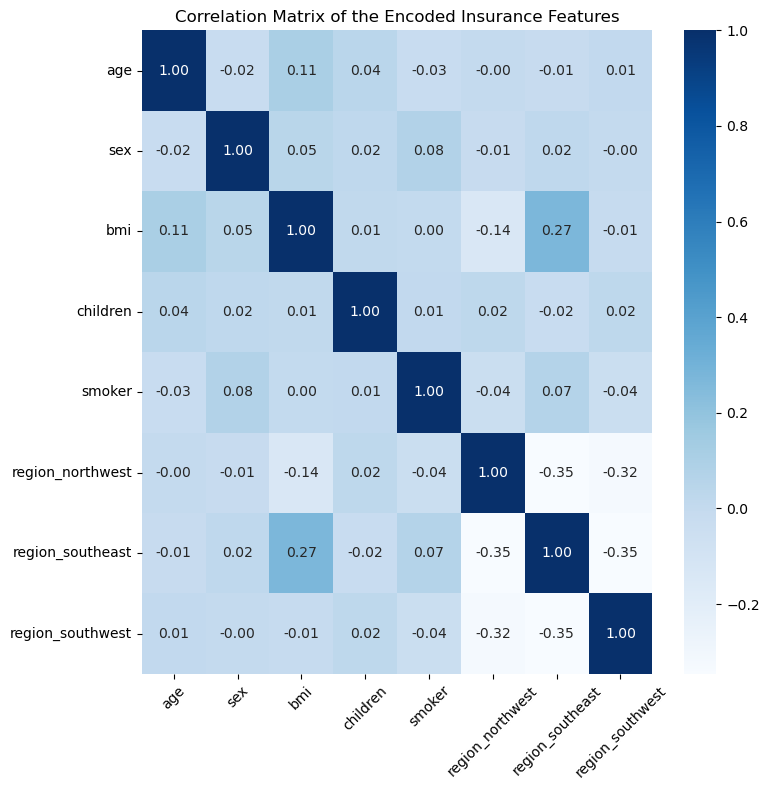

In [58]:
### Code here

corr_matrix = insurance_X_encoded.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(rotation=45)
plt.title('Correlation Matrix of the Encoded Insurance Features')
plt.tight_layout()
plt.show()


In [59]:
### Comment here
'''
The correlation matrix is as above, there is no entry larger than 0.8 so we don't need to drop. This is necessary because if we have highly correlated 
features, then we are just doing nothing when analyzing both of them so we only need to keep one to save complexity. 
It can also lead to overfitting and make the model sensitive to noise in data. 
'''

"\nThe correlation matrix is as above, there is no entry larger than 0.8 so we don't need to drop. This is necessary because if we have highly correlated \nfeatures, then we are just doing nothing when analyzing both of them so we only need to keep one to save complexity. \nIt can also lead to overfitting and make the model sensitive to noise in data. \n"

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [60]:
### Code here

insurance_X_train, insurance_X_temp, insurance_y_train, insurance_y_temp = train_test_split(insurance_X_encoded,  insurance_y, test_size=0.4)
insurance_X_val, insurance_X_test, insurance_y_val, insurance_y_test = train_test_split(insurance_X_temp, insurance_y_temp, test_size=0.5)

**2.1.6 Standardize the columns in the feature matrices.**

In [61]:
### Code here

scaler = StandardScaler()
insurance_X_train = scaler.fit_transform(insurance_X_train)
insurance_X_val = scaler.transform(insurance_X_val)
insurance_X_test = scaler.transform(insurance_X_test)

In [62]:
# Adding a column of ones to include the bias term

insurance_X_train = np.hstack([np.ones((insurance_X_train.shape[0], 1)), insurance_X_train])
insurance_X_val = np.hstack([np.ones((insurance_X_val.shape[0], 1)), insurance_X_val])
insurance_X_test = np.hstack([np.ones((insurance_X_test.shape[0], 1)), insurance_X_test])

At the end of this pre-processing, you should have the following vectors and matrices:

- **insurance_X_train**: Training set feature matrix.
- **insurance_X_val**: Validation set feature matrix.
- **insurance_X_test**: Test set feature matrix.
- **insurance_y_train**: Training set labels (insurance charges).
- **insurance_y_val**: Validation set labels.
- **insurance_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$





**2.1.7 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [63]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        ### Your code here
        self.w = np.linalg.solve(X.T @ X + self.alpha * np.eye(X.shape[-1]), X.T @ y)
        

    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X @ self.w
        return y_pred


**2.1.8 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the insurance dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [64]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [65]:
### Code here

linear_model = LinearRegression()
linear_model.train(insurance_X_train, insurance_y_train)

insurance_y_train_pred = linear_model.predict(insurance_X_train)
insurance_y_val_pred = linear_model.predict(insurance_X_val)
insurance_y_test_pred = linear_model.predict(insurance_X_test)

r2_train = r2_score(insurance_y_train, insurance_y_train_pred)
r2_val = r2_score(insurance_y_val, insurance_y_val_pred)
r2_test = r2_score(insurance_y_test, insurance_y_test_pred)

print(f'R^2 training: {r2_train:.4f}\nR^2 validation: {r2_val:.4f}\nR^2 test: {r2_test:.4f}')
get_report(insurance_y_test, insurance_y_test_pred)

R^2 training: 0.7490
R^2 validation: 0.7560
R^2 test: 0.7448


,Prediction,Actual
Position,,
1,5397.61670,9496.894343
2,27941.28758,16518.374991
3,7804.16050,12568.378022
266,10231.49990,11630.893488
267,2200.83085,2728.400618
268,11015.17470,11098.786533


**2.1.9 Use the mean of the training labels (insurance_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [66]:
### Code here

baseline_prediction = insurance_y_train.mean()

r2_train_baseline = r2_score(insurance_y_train, [baseline_prediction] * len(insurance_y_train))
r2_val_baseline = r2_score(insurance_y_val, [baseline_prediction] * len(insurance_y_val))
r2_test_baseline = r2_score(insurance_y_test, [baseline_prediction] * len(insurance_y_test))

print(f'Baseline R^2 training: {r2_train_baseline:.4f}\nBaseline R^2 validation: {r2_val_baseline:.4f}\nBaseline R^2 test: {r2_test_baseline:.4f}')

Baseline R^2 training: 0.0000
Baseline R^2 validation: -0.0036
Baseline R^2 test: -0.0024


**2.1.10 Interpret your model trained on the insurance dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

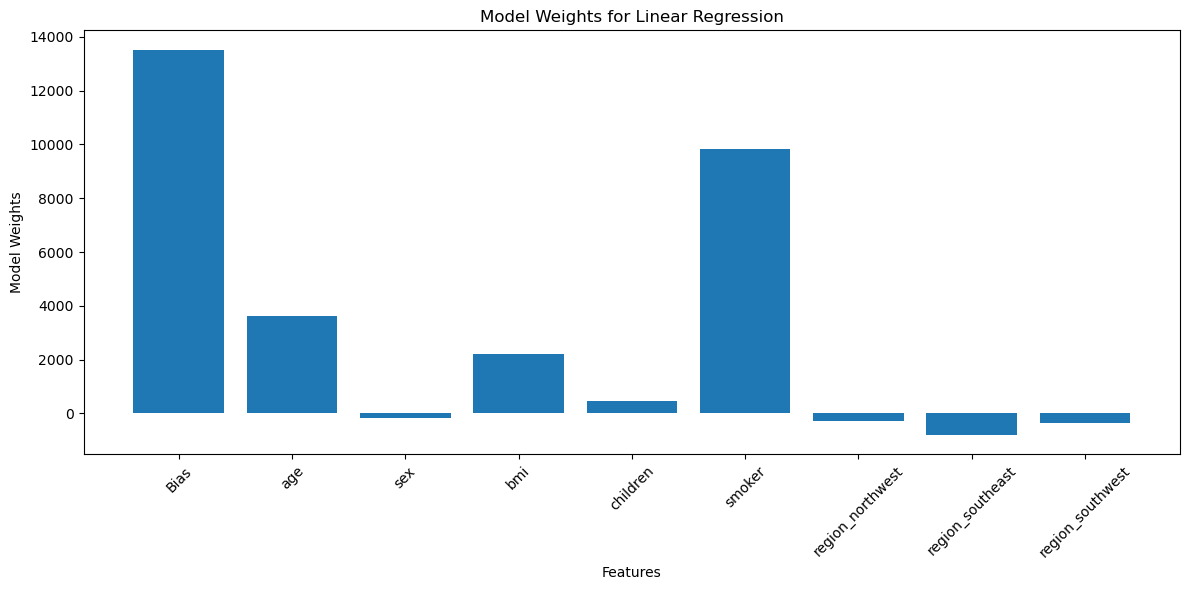

In [67]:
### Code here

feature_names = ['Bias'] + list(insurance_X_encoded.columns)

plt.figure(figsize=(12, 6))
plt.bar(feature_names, linear_model.w)
plt.xlabel('Features')
plt.ylabel('Model Weights')
plt.title('Model Weights for Linear Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2.1.11 According to your model, which features are the greatest contributors to insurance charges?**

In [68]:
### Comment here

'''
I think the feature with the largest weight contributes the most which is 'smoker'.
'''

"\nI think the feature with the largest weight contributes the most which is 'smoker'.\n"

### **Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the insurance dataset.

**2.1.12 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.****

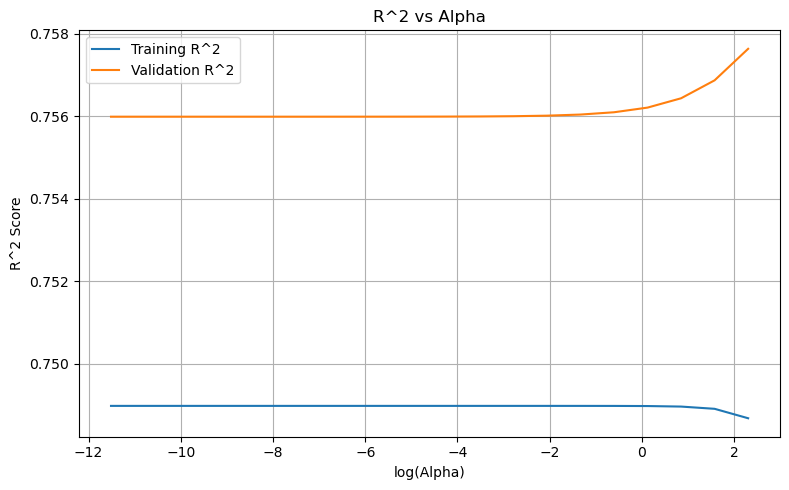

In [69]:
### Code here

alphas = np.logspace(-5, 1, 20)
train_r2_scores = []
val_r2_scores = []

for alpha in alphas:
    ridge_model = LinearRegression(alpha=alpha)
    ridge_model.train(insurance_X_train, insurance_y_train)
    r2_train = r2_score(insurance_y_train, ridge_model.predict(insurance_X_train))
    r2_val = r2_score(insurance_y_val, ridge_model.predict(insurance_X_val))
    train_r2_scores.append(r2_train)
    val_r2_scores.append(r2_val)

plt.figure(figsize=(8, 5))
plt.plot(np.log(alphas), train_r2_scores, label='Training R^2')
plt.plot(np.log(alphas), val_r2_scores, label='Validation R^2')
plt.xlabel('log(Alpha)')
plt.ylabel('R^2 Score')
plt.title('R^2 vs Alpha')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [70]:
### Comment here

'''
As alpha increases, the model become more regularized. Training R^2 decreases when Alpha get really big, while Validation R^2 performance initially 
increases and will eventually decreases because appropriate alpha makes the model generalize better. 
'''

'\nAs alpha increases, the model become more regularized. Training R^2 decreases when Alpha get really big, while Validation R^2 performance initially \nincreases and will eventually decreases because appropriate alpha makes the model generalize better. \n'

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [140]:
### Code here

loan_data_df = pd.read_csv('loan_data.csv')
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [141]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [142]:
### Code here

missing_values = loan_data_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [143]:
### Code here

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_feature_names = ['LoanAmount', 'Loan_Amount_Term']
cat_feature_names = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

loan_data_df[num_feature_names] = num_imputer.fit_transform(loan_data_df[num_feature_names])
loan_data_df[cat_feature_names] = cat_imputer.fit_transform(loan_data_df[cat_feature_names])
loan_data_df['Credit_History'] = loan_data_df['Credit_History'].astype('float')

In [144]:
### Comment here
'''
The number of missing values in each column are shown as above. I chose to impute these missing values. 
For numerical features LoanAmount, impute with the median value rather than mean to make it robust to extreme values;
For categorical features Loan_Amount_Term, Gender, Married, Dependents, Self_Employed, Credit_History, impute with the most frequent value.
This is the best way because these values are stable and can prevent data distortion.
'''

'\nThe number of missing values in each column are shown as above. I chose to impute these missing values. \nFor numerical features LoanAmount, impute with the median value rather than mean to make it robust to extreme values;\nFor categorical features Loan_Amount_Term, Gender, Married, Dependents, Self_Employed, Credit_History, impute with the most frequent value.\nThis is the best way because these values are stable and can prevent data distortion.\n'

**2.2.3 Encode the categorical variables.**

In [145]:
### Code here

loan_data_df_encoded = loan_data_df.copy()

# Ordinal encoding for 'sex' and 'smoker'
ordinal_encoder = OrdinalEncoder()
loan_data_df_encoded[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status']] = ordinal_encoder.fit_transform(loan_data_df_encoded[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status']])

# One-hot encoding for 'region'
onehot_encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid dummy variable trap
property_encoded = onehot_encoder.fit_transform(loan_data_df_encoded[['Property_Area']])
property_columns = onehot_encoder.get_feature_names_out(['Property_Area'])

loan_data_df_encoded = loan_data_df_encoded.drop(columns=['Property_Area'])
loan_data_df_encoded[property_columns] = property_encoded
loan_data_df_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,1.0,0.0,1.0


**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

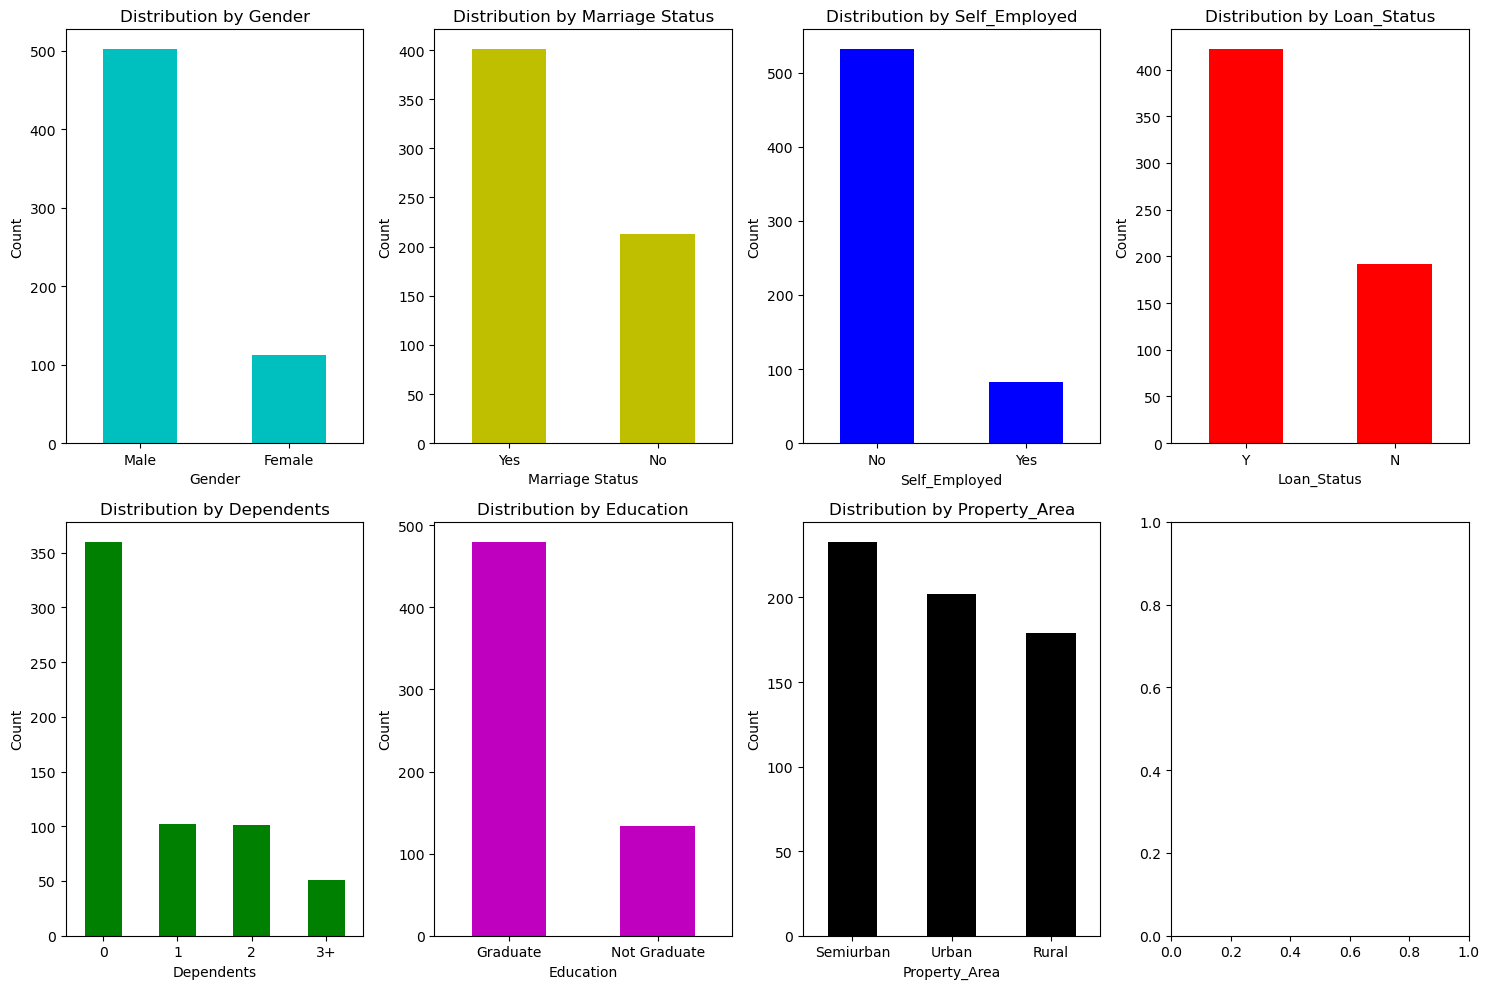

In [146]:
### Code here

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

loan_data_df['Gender'].value_counts().plot(kind='bar', rot=0, ax=axes[0, 0], color='c')
axes[0, 0].set_title('Distribution by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

loan_data_df['Married'].value_counts().plot(kind='bar', rot=0, ax=axes[0, 1], color='y')
axes[0, 1].set_title('Distribution by Marriage Status')
axes[0, 1].set_xlabel('Marriage Status')
axes[0, 1].set_ylabel('Count')

loan_data_df['Dependents'].value_counts().sort_index().plot(kind='bar', rot=0, ax=axes[1, 0], color='g')
axes[1, 0].set_title('Distribution by Dependents')
axes[1, 0].set_xlabel('Dependents')
axes[1, 0].set_ylabel('Count')

loan_data_df['Education'].value_counts().plot(kind='bar', rot=0, ax=axes[1, 1], color='m')
axes[1, 1].set_title('Distribution by Education')
axes[1, 1].set_xlabel('Education')
axes[1, 1].set_ylabel('Count')

loan_data_df['Self_Employed'].value_counts().plot(kind='bar', rot=0, ax=axes[0, 2], color='b')
axes[0, 2].set_title('Distribution by Self_Employed')
axes[0, 2].set_xlabel('Self_Employed')
axes[0, 2].set_ylabel('Count')

loan_data_df['Property_Area'].value_counts().plot(kind='bar', rot=0, ax=axes[1, 2], color='k')
axes[1, 2].set_title('Distribution by Property_Area')
axes[1, 2].set_xlabel('Property_Area')
axes[1, 2].set_ylabel('Count')

loan_data_df['Loan_Status'].value_counts().plot(kind='bar', rot=0, ax=axes[0, 3], color='r')
axes[0, 3].set_title('Distribution by Loan_Status')
axes[0, 3].set_xlabel('Loan_Status')
axes[0, 3].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [147]:
### Comment here

'''
The label 'Loan_Status' is not very balanced as shown in the last fig. True labels are nearly twice as common as false labels. While among all X variables, 
'Property_Area' is almost evenly distributed and others are not.
'''

"\nThe label 'Loan_Status' is not very balanced as shown in the last fig. True labels are nearly twice as common as false labels. While among all X variables, \n'Property_Area' is almost evenly distributed and others are not.\n"

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

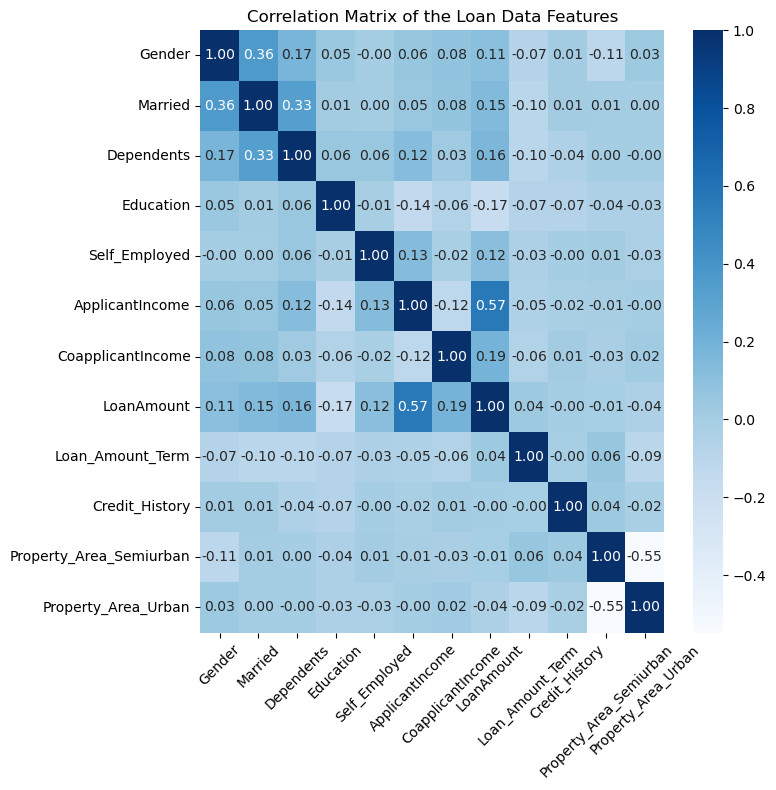

In [148]:
### Code here

loan_data_X_encoded = loan_data_df_encoded.drop(columns=['Loan_Status'])
loan_data_y_encoded = loan_data_df_encoded['Loan_Status']

corr_matrix = loan_data_X_encoded.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(rotation=45)
plt.title('Correlation Matrix of the Loan Data Features')
plt.tight_layout()
plt.show()


In [149]:
### Code here

# no correlation is greater than 0.9

In [150]:
### Code here


**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [151]:
### Code here

loan_data_y_encoded = loan_data_y_encoded.to_numpy()[:, None]
loan_data_X_train, loan_data_X_temp, loan_data_y_train, loan_data_y_temp = train_test_split(loan_data_X_encoded,  loan_data_y_encoded, test_size=0.4)
loan_data_X_val, loan_data_X_test, loan_data_y_val, loan_data_y_test = train_test_split(loan_data_X_temp, loan_data_y_temp, test_size=0.5)

scaler = StandardScaler()
loan_data_X_train = scaler.fit_transform(loan_data_X_train)
loan_data_X_val = scaler.transform(loan_data_X_val)
loan_data_X_test = scaler.transform(loan_data_X_test)

loan_data_X_train = np.hstack([np.ones((loan_data_X_train.shape[0], 1)), loan_data_X_train])
loan_data_X_val = np.hstack([np.ones((loan_data_X_val.shape[0], 1)), loan_data_X_val])
loan_data_X_test = np.hstack([np.ones((loan_data_X_test.shape[0], 1)), loan_data_X_test])

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [152]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))

        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y).item())
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

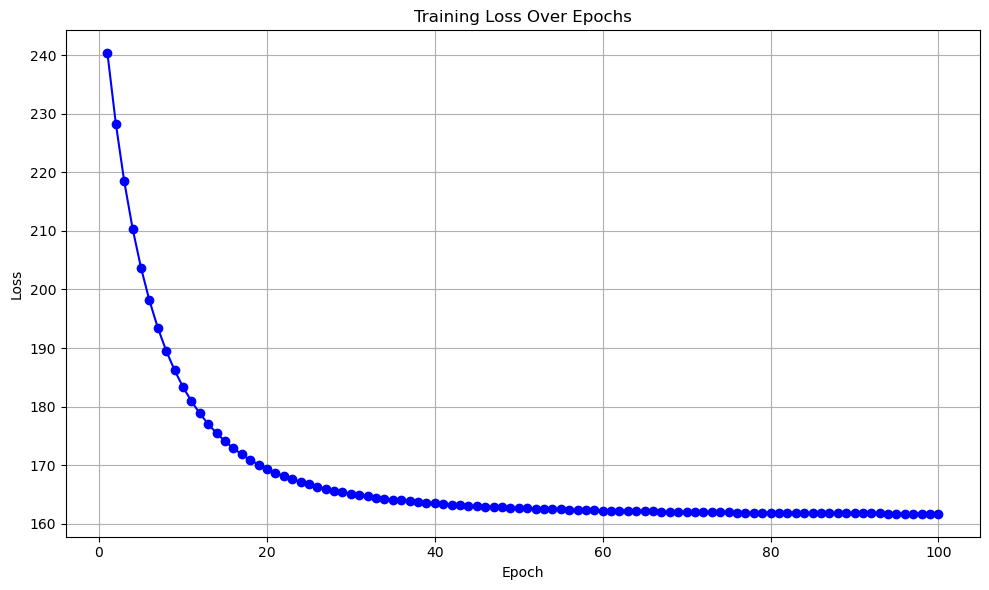

0.8048780487804879

In [153]:
### Code here

# i)
logistic_model = LogisticRegression()
loss = logistic_model.train(loan_data_X_train, loan_data_y_train)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss) + 1), loss, marker='o', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid()
plt.tight_layout()
plt.show()

loan_data_y_test_pred = logistic_model.predict(loan_data_X_test)
accuracy_score(loan_data_y_test, loan_data_y_test_pred)

In [154]:
### Code here 

# ii)

alphas = np.random.uniform(0, 1, 20)
etas = np.random.uniform(0, 1e-3, 20)
ts = np.random.randint(0, 101, 20)

best_val_accuracy = 0
best_hyperparams = {}

for alpha, eta, t in zip(alphas, etas, ts):
    logistic_model = LogisticRegression(alpha=alpha, t=t, eta=eta)
    loss = logistic_model.train(loan_data_X_train, loan_data_y_train)
    loan_data_y_val_pred = logistic_model.predict(loan_data_X_val)
    val_accuracy = accuracy_score(loan_data_y_val, loan_data_y_val_pred)

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_hyperparams = {'alpha': alpha, 'eta': eta, 't': t}

print(f"Best Hyperparameters: {best_hyperparams}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

Best Hyperparameters: {'alpha': 0.8742757567071898, 'eta': 0.00033212499885817314, 't': 88}
Best Validation Accuracy: 0.7967


In [155]:
### Code here

# iii)

logistic_model = LogisticRegression()
loss = logistic_model.train(loan_data_X_train, loan_data_y_train)
logistic_model_best = LogisticRegression(**best_hyperparams)
loss = logistic_model_best.train(loan_data_X_train, loan_data_y_train)

loan_data_y_test_pred = logistic_model.predict(loan_data_X_test)
loan_data_y_test_pred_best = logistic_model_best.predict(loan_data_X_test)

test_accuracy = accuracy_score(loan_data_y_test, loan_data_y_test_pred)
test_accuracy_best = accuracy_score(loan_data_y_test, loan_data_y_test_pred_best)

print(f"Test Accuracy with the original hyperparams: {test_accuracy:.4f}")
print(f"Test Accuracy with the best hyperparams: {test_accuracy_best:.4f}")

Test Accuracy with the original hyperparams: 0.8049
Test Accuracy with the best hyperparams: 0.8130


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

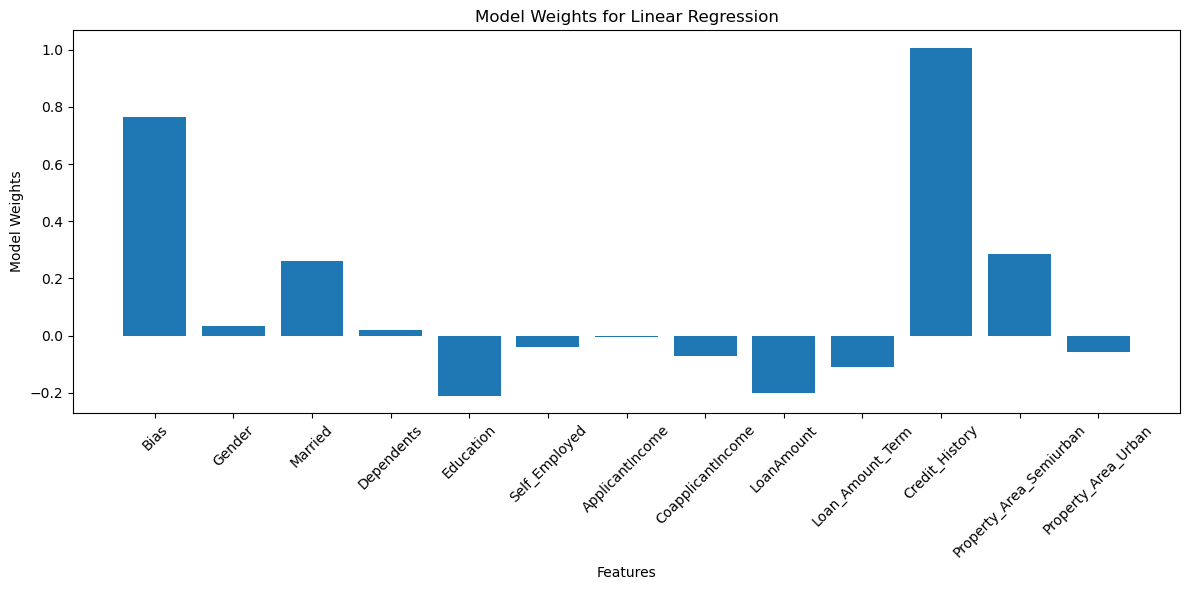

In [156]:
### Code here

feature_names = ['Bias'] + list(loan_data_X_encoded.columns)

plt.figure(figsize=(12, 6))
plt.bar(feature_names, logistic_model_best.w[:, 0])
plt.xlabel('Features')
plt.ylabel('Model Weights')
plt.title('Model Weights for Linear Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [157]:
### Comment here
'''
According to the bar chart, we can easily find that Credit_History contributes the most towards Loan_Status positively. Features like Self_Employed, 
LoanAmount, Not_Graduate have negative effect, while features like Married, Property_Area_Semiurban have positive effect, which is generally in line 
with our daily cognition.
'''

'\nAccording to the bar chart, we can easily find that Credit_History contributes the most towards Loan_Status positively. Features like Self_Employed, \nLoanAmount, Not_Graduate have negative effect, while features like Married, Property_Area_Semiurban have positive effect, which is generally in line \nwith our daily cognition.\n'

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [162]:
### Code here

primal_svm = LinearSVC(C=1.0, max_iter=5000, dual=False)

primal_svm.fit(loan_data_X_train, loan_data_y_train[:, 0])

loan_data_y_train_pred = primal_svm.predict(loan_data_X_train)
loan_data_y_val_pred = primal_svm.predict(loan_data_X_val)
loan_data_y_test_pred = primal_svm.predict(loan_data_X_test)

# Calculate accuracies
train_accuracy = accuracy_score(loan_data_y_train, loan_data_y_train_pred)
val_accuracy = accuracy_score(loan_data_y_val, loan_data_y_val_pred)
test_accuracy = accuracy_score(loan_data_y_test, loan_data_y_test_pred)

print(f"Primal SVM Training Accuracy: {train_accuracy:.4f}")
print(f"Primal SVM Validation Accuracy: {val_accuracy:.4f}")
print(f"Primal SVM Test Accuracy: {test_accuracy:.4f}")


Primal SVM Training Accuracy: 0.8152
Primal SVM Validation Accuracy: 0.7886
Primal SVM Test Accuracy: 0.8211


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [163]:
### Code here

dual_svm = SVC(kernel='linear', C=1.0)

dual_svm.fit(loan_data_X_train, loan_data_y_train[:, 0])

loan_data_y_train_pred = dual_svm.predict(loan_data_X_train)
loan_data_y_val_pred = dual_svm.predict(loan_data_X_val)
loan_data_y_test_pred = dual_svm.predict(loan_data_X_test)

# Calculate accuracies
train_accuracy = accuracy_score(loan_data_y_train, loan_data_y_train_pred)
val_accuracy = accuracy_score(loan_data_y_val, loan_data_y_val_pred)
test_accuracy = accuracy_score(loan_data_y_test, loan_data_y_test_pred)

print(f"Dual SVM Training Accuracy: {train_accuracy:.4f}")
print(f"Dual SVM Validation Accuracy: {val_accuracy:.4f}")
print(f"Dual SVM Test Accuracy: {test_accuracy:.4f}")

Dual SVM Training Accuracy: 0.8125
Dual SVM Validation Accuracy: 0.7886
Dual SVM Test Accuracy: 0.8211
